In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

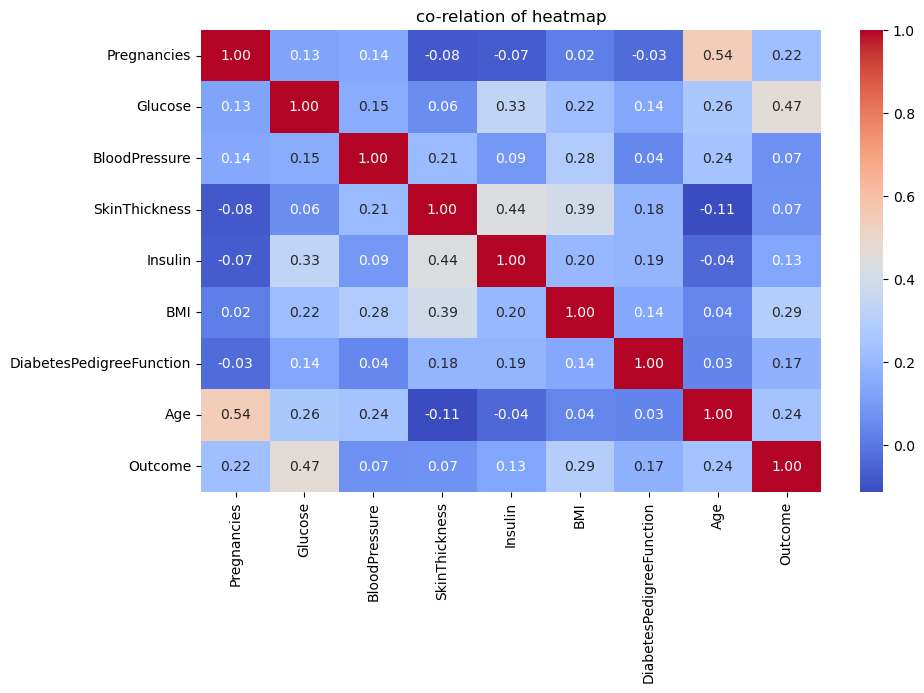

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.title('co-relation of heatmap')
plt.show()

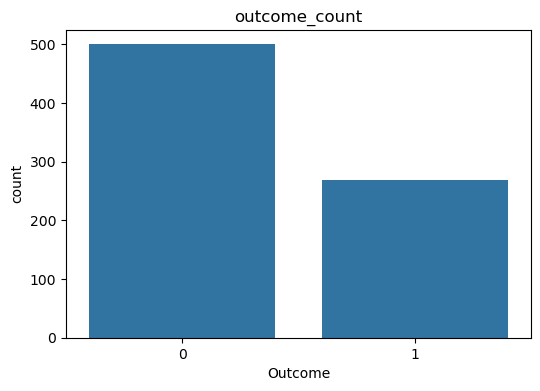

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x='Outcome',data=df)
plt.title('outcome_count')
plt.show()

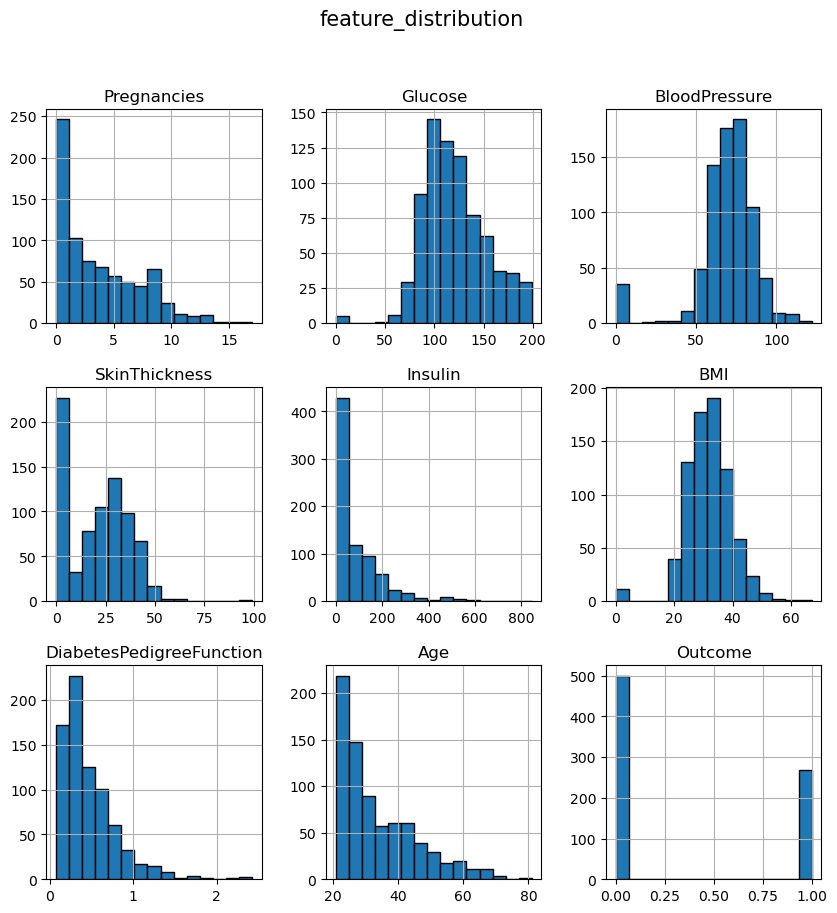

In [29]:
df.hist(bins=15, figsize=(10,10), edgecolor='black')
plt.suptitle('feature_distribution', fontsize=15)
plt.show()


Data Preprocessing

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
x=df.drop('Outcome',axis=1)

In [87]:
y=df['Outcome']

In [88]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [89]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [90]:
scaler=StandardScaler()

In [91]:
x_train_scaled=scaler.fit_transform(x_train)
x_text_scaled=scaler.transform(x_test)

In [92]:
import pickle

In [93]:
pickle.dump(scaler,open('scaler.pkl','wb'))

Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model=LogisticRegression()

In [96]:
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [97]:
from sklearn.metrics import accuracy_score

In [104]:
y_pred=model.predict(x_text_scaled)
test_accuracy=accuracy_score(y_test,y_pred)
print(test_accuracy)

0.7532467532467533


In [118]:
pickle.dump(model,open('model.pkl','wb'))

DICISION TREE

In [106]:
from sklearn import tree

In [107]:
clf=tree.DecisionTreeClassifier()

In [108]:
clf.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [110]:
y_pred_1=clf.predict(x_text_scaled)
test_accuracy=accuracy_score(y_test,y_pred_1)
print(test_accuracy)

0.7337662337662337


RANDOM FOREST

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
rf=RandomForestClassifier(n_estimators=100)

In [116]:
rf.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [117]:
y_pred_2=rf.predict(x_text_scaled)
test_accuracy=accuracy_score(y_test,y_pred_2)
print(test_accuracy)

0.7337662337662337


SVM(SUPPORT VECTOR MACHINE) 

In [119]:
from sklearn.svm import SVC

In [121]:
model2=SVC()

In [122]:
model2.fit(x_train_scaled,y_train)

SVC()

In [123]:
y_pred_3=model2.predict(x_text_scaled)
test_accuracy=accuracy_score(y_test,y_pred_3)
print(test_accuracy)

0.7337662337662337
